In [26]:
import pandas as pd
import plotly.express as px

In [2]:
sales = pd.read_csv(r'C:\Users\Nowy_użytkownik\Desktop\SampleSuperstore.csv')

In [3]:
sales

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
sales.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [101]:
state = sales.groupby(['State'])
state_profit = state['Profit'].sum().to_frame()
state_profit.sort_values(by=['Profit'], ascending = False)

,Profit
State,
California,76381.3871
New York,74038.5486
Washington,33402.6517
Michigan,24463.1876
Virginia,18597.9504
Indiana,18382.9363
Georgia,16250.0433
Kentucky,11199.6966
Minnesota,10823.1874


In [104]:
state_profit[state_profit['Profit'] < 0]

,Profit
State,
Arizona,-3427.9246
Colorado,-6527.8579
Florida,-3399.3017
Illinois,-12607.8870
North Carolina,-7490.9122
Ohio,-16971.3766
Oregon,-1190.4705
Pennsylvania,-15559.9603
Tennessee,-5341.6936


In [105]:
city = sales.groupby(['State','City'])
city_profit = city['Profit'].sum().to_frame()
city_profit

Profit
State     City                 
Alabama   Auburn       452.6071
          Decatur     1000.0881
          Florence     248.6589
          Hoover        18.7173
          Huntsville  1005.2572
...                         ...
Wisconsin Superior     514.0822
          Waukesha      14.1700
          Wausau        90.4306
          West Allis    28.3708
Wyoming   Cheyenne     100.1960

[604 rows x 1 columns]

In [106]:
city_profit.sort_values(by=['Profit'], ascending = False).head(10)

,,Profit
State,City,
New York,New York City,62036.9837
California,Los Angeles,30440.7579
Washington,Seattle,29156.0967
California,San Francisco,17507.3854
Michigan,Detroit,13181.7908
Indiana,Lafayette,8976.0973
Delaware,Newark,8086.1715
Georgia,Atlanta,6993.6629
Minnesota,Minneapolis,6824.5846


In [107]:
city_profit.sort_values(by=['Profit']).head(10)

Profit
State          City                    
Pennsylvania   Philadelphia -13837.7674
Texas          Houston      -10153.5485
               San Antonio   -7299.0502
Ohio           Lancaster     -7149.6180
Illinois       Chicago       -6654.5688
North Carolina Burlington    -5894.5269
Colorado       Louisville    -3406.2095
Texas          Dallas        -2846.5257
Arizona        Phoenix       -2790.8832
Florida        Jacksonville  -2445.6608

In [11]:
state = sales.groupby(['State'])
state_profit = state['Profit'].sum().to_frame()
state_profit.sort_values(by=['Profit'], ascending = False)

In [108]:
segment = sales.groupby(['Segment'])
segment_sum = segment['Profit'].sum().to_frame()
segment_sum

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


In [111]:
total_sum = sales['Profit'].sum()
perc_segment = (segment_sum/total_sum)*100
perc_segment.rename(columns={'Profit': '%_total_profit'}, inplace = True)
segment_sales = pd.concat([segment_sum, perc_segment], axis = 'columns', sort = False )
segment_sales

,Profit,%_total_profit
Segment,,
Consumer,134119.2092,46.829820
Corporate,91979.1340,32.115953
Home Office,60298.6785,21.054227


In [114]:
group = sales.groupby(['State', 'Category', 'Sub-Category'])
c = group[['Quantity', 'Profit']].sum()
c.sort_values(by=['Profit'], ascending = False)

Quantity      Profit
State          Category        Sub-Category                      
New York       Technology      Machines            73  17320.0762
                               Phones             393  13399.1892
               Office Supplies Binders            696  11096.0260
California     Technology      Accessories        568  11095.6565
Michigan       Office Supplies Binders            192  11079.5050
...                                               ...         ...
North Carolina Technology      Machines            11  -5384.8086
Texas          Office Supplies Appliances         159  -6147.2225
Illinois       Office Supplies Binders            327  -7204.3242
Ohio           Technology      Machines            39 -11770.9447
Texas          Office Supplies Binders            626 -14705.0738

[656 rows x 2 columns]

In [29]:
pd.DataFrame(sales['Discount'].agg(['mean', 'median']))

,Discount
mean,0.156203
median,0.200000


In [68]:
subcategory = pd.DataFrame(sales.groupby(['Region','State', 'Sub-Category'])['Quantity'].sum())
subcategory

Quantity
Region  State      Sub-Category          
Central Illinois   Accessories        145
                   Appliances          76
                   Art                149
                   Binders            327
                   Bookcases           43
...                                   ...
West    Washington Phones             116
                   Storage            182
                   Supplies            30
                   Tables             109
        Wyoming    Chairs               4

[656 rows x 1 columns]

In [69]:
subcategory.describe()

,Quantity
count,656.000000
mean,57.733232
std,111.509397
min,1.000000
25%,8.750000
50%,22.000000
75%,54.000000
max,1091.000000


In [70]:
import plotly.express as px
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

In [115]:
hist = px.histogram(subcategory, x='Quantity')
hist.show()

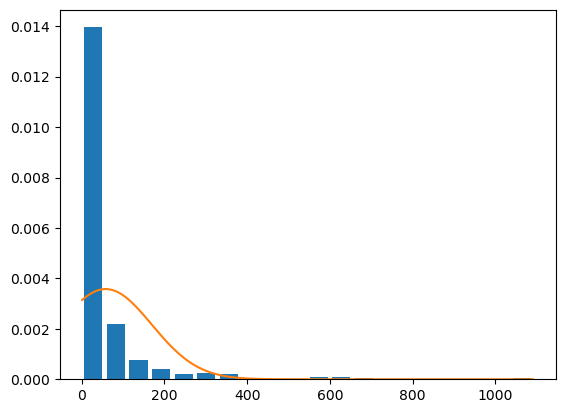

In [71]:
plt.hist(subcategory.Quantity, bins=20, rwidth=0.8, density=True)
rng = np.arange(subcategory.Quantity.min(), subcategory.Quantity.max(), 0.1)
plt.plot(rng, norm.pdf(rng, subcategory.Quantity.mean(), subcategory.Quantity.std()))

In [73]:
box = px.box(subcategory, y='Quantity')
box.show()

In [75]:
Q1 = subcategory['Quantity'].quantile(0.25)
Q3 = subcategory['Quantity'].quantile(0.75)
Q1, Q3

(8.75, 54.0)

In [76]:
IQR = Q3 - Q1
IQR

45.25

In [77]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-59.125, 121.875)

In [116]:
outliers = subcategory[(subcategory['Quantity'] < lower_limit) | (subcategory['Quantity'] > upper_limit)]
outliers

Quantity
Region  State          Sub-Category          
Central Illinois       Accessories        145
                       Art                149
                       Binders            327
                       Chairs             147
                       Furnishings        193
                       Paper              246
                       Phones             131
                       Storage            151
        Michigan       Binders            192
        Texas          Accessories        281
                       Appliances         159
                       Art                259
                       Binders            626
                       Chairs             235
                       Furnishings        308
                       Paper              572
                       Phones             315
                       Storage            309
East    New York       Accessories        276
                       Appliances         166
                       Art                336
                       Binders            696
                       Chairs             313
                       Furnishings        356
                       Labels             178
                       Paper              565
                       Phones             393
                       Storage            356
        Ohio           Accessories        155
                       Art                140
                       Binders            292
                       Furnishings        184
                       Paper              194
                       Phones             179
                       Storage            123
        Pennsylvania   Accessories        141
                       Art                155
                       Binders            331
                       Chairs             153
                       Furnishings        225
                       Paper              236
                       Phones             235
                       Storage            169
South   Florida        Binders            262
                       Furnishings        150
                       Paper              198
                       Phones             130
        Georgia        Paper              139
        North Carolina Binders            185
                       Paper              139
West    Arizona        Binders            155
                       Paper              124
        California     Accessories        568
                       Appliances         346
                       Art                644
                       Binders           1057
                       Bookcases          198
                       Chairs             466
                       Envelopes          149
                       Fasteners          148
                       Furnishings        751
                       Labels             349
                       Paper             1091
                       Phones             691
                       Storage            637
                       Supplies           145
                       Tables             281
        Washington     Accessories        198
                       Binders            365
                       Furnishings        173
                       Paper              218
                       Storage            182